In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [5]:
titanic_data=pd.read_csv('train_clean.csv')
titanic_data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
600,24.0,NaN,S,27.0000,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",1,601,2,female,2,1.0,243847,Mrs,3
791,16.0,NaN,S,26.0000,"Gaskell, Mr. Alfred",0,792,2,male,0,0.0,239865,Mr,0
624,21.0,NaN,S,16.1000,"Bowen, Mr. David John ""Dai""",0,625,3,male,0,0.0,54636,Mr,0
441,20.0,NaN,S,9.5000,"Hampe, Mr. Leon",0,442,3,male,0,0.0,345769,Mr,0
652,21.0,NaN,S,8.4333,"Kalvik, Mr. Johannes Halvorsen",0,653,3,male,0,0.0,8475,Mr,0


In [8]:
print('Passenger count = ',len(titanic_data))

Passenger count =  891


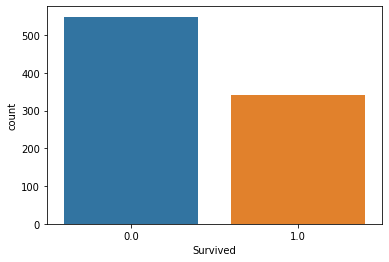

In [9]:
sns.countplot(x='Survived',data=titanic_data)

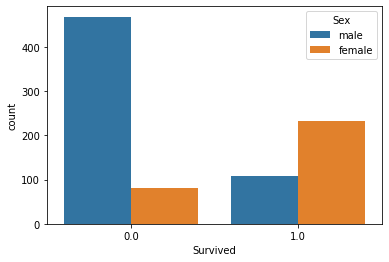

In [10]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

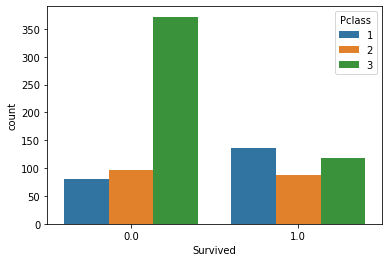

In [13]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)

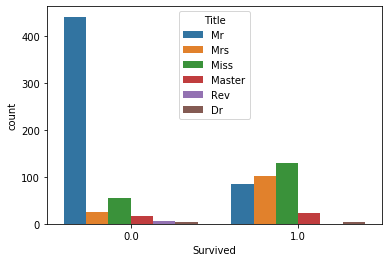

In [14]:
sns.countplot(x='Survived',hue='Title',data=titanic_data)

In [15]:
titanic_data.isnull().any()

Age            False
Cabin           True
Embarked       False
Fare           False
Name           False
Parch          False
PassengerId    False
Pclass         False
Sex            False
SibSp          False
Survived       False
Ticket         False
Title          False
Family_Size    False
dtype: bool

In [16]:
#null value is repalced by the mean automatically
#we can replace by the median also


In [17]:
#if it is a string then it will replace by the more occurence of perticular string

In [21]:
titanic_data['Cabin'].isnull.sum()

AttributeError: 'function' object has no attribute 'sum'

In [20]:
titanic_data['Cabin'].isnull().sum()

687

In [22]:
titanic_data.drop('Cabin',axis=1,inplace=True)
#inplace=True will update the titanic_data

In [23]:
titanic_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


In [29]:
sex=pd.get_dummies(titanic_data['Sex'])  #we have both male and female column


In [30]:
sex

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [35]:
#countinuation of above one 
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) #drop_first=True  One column is enough. 
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [31]:
embarked=pd.get_dummies(titanic_data['Embarked'])    
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [37]:
embarked=pd.get_dummies(titanic_data['Embarked'],drop_first=True)    
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [38]:
titanic_data=pd.concat([titanic_data,sex,embarked],axis=1)

In [44]:
titanic_data.head()

,Age,Parch,Pclass,SibSp,Survived,Family_Size,male,Q,S
0,22.0,0,3,1,0.0,1,1,0,1
1,38.0,0,1,1,1.0,1,0,0,0
2,26.0,0,3,0,1.0,0,0,0,1
3,35.0,0,1,1,1.0,1,0,0,1
4,35.0,0,3,0,0.0,0,1,0,1


In [45]:
titanic_data=titanic_data.drop(['Embarked','Fare','Sex','Ticket','PassengerId','Title','Name'],axis=1) 
#axis=1 means colums & axis=0 means rows

KeyError: "['Embarked' 'Fare' 'Sex' 'Ticket' 'PassengerId' 'Title' 'Name'] not found in axis"

In [47]:
x=titanic_data.drop(['Survived'],axis=1) #here it will not update in the titanic_data table
y=titanic_data.Survived

In [48]:
from sklearn.model_selection import train_test_split #cross_validation
from sklearn.linear_model import LogisticRegression

In [49]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [50]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\JASMITHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred=model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [53]:
accuracy_score(y_test,pred)

0.8268156424581006

In [54]:
confusion_matrix(y_test,pred)

array([[98, 11],
       [20, 50]], dtype=int64)

In [55]:
test_data=pd.read_csv('test_clean.csv')
test_data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
93,30.0,NaN,S,8.0500,"Guest, Mr. Robert",0,985,3,male,0,NaN,376563,Mr,0
297,30.0,NaN,C,21.6792,"Samaan, Mr. Hanna",0,1189,3,male,2,NaN,2662,Mr,2
182,18.0,D30,S,53.1000,"Marvin, Mrs. Daniel Warner (Mary Graham Carmic...",0,1074,1,female,1,NaN,113773,Mrs,1
323,33.0,NaN,S,26.5500,"Rowe, Mr. Alfred G",0,1215,1,male,0,NaN,113790,Mr,0
218,50.0,C80,C,211.5000,"Widener, Mrs. George Dunton (Eleanor Elkins)",1,1110,1,female,1,NaN,113503,Mrs,2
